# Prueba Intertrimestral

Nombre y Apellidos:

Tiempo de la prueba: 1h y 45 mins

Asignatura: Desarrollo de Aplicaciones para la Visualización de Datos

Fecha: 14 de octubre de 2024

Instrucciones:

- Herramientas Sugeridas: Python (pandas, matplotlib, seaborn, scikit-learn).

- Evaluación: Se valorará la capacidad para interpretar los resultados y la claridad en la exposición de las conclusiones.

- Materiales permitidos: Materiales de clase. Internet para búsqueda de dudas y documentación.

- Prohibido: Mingún tipo de LLM, ni mensajería instantánea.

- Formato de Entrega: Los estudiantes deben presentar su trabajo en formato de notebook (por ejemplo, Jupyter Notebook), con gráficos y explicaciones detalladas.

- Entrega: Subir .ipynb y PDF a Github. Enviar resultados al siguiente enlace. Para crear PDF: File -> Print -> Destination as PDF

## [Entrega aquí el examen](https://forms.gle/gU7aKkzE7didZpYV7)




Carga aquí las librerías que creas que vayas a utilizar:

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import sklearn.datasets

import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression

# Ejercicio 1: Programación (2 puntos)

a) Crea una función que calcule y devuelva el valor de la iteración $n+1$ del mapa logístico dada la fórmula:

$x_{n+1}=r⋅x_n⋅(1−x_n)$

donde:

- $r$ es la tasa de crecimiento
- $x_n$ es el valor de la iteración anterior.

La función debe aceptar como parámetros $r$ y $x_n$ (valor inicial). (0.6 puntos)


In [182]:
def mapa_logistico(r, x_n):
    return r*x_n*(1-x_n)

b) Crea una función que genere una lista con las primeras n iteraciones del mapa logístico, utilizando la función anterior. (0.6 puntos)

In [183]:
def iteracion_de_mapa_logistico(x_primera,n, r):
    lista = [x_primera]
    for i in range(n):
        # iteraciones[-1] es el último valor del array iteraciones
        x_next = r * lista[-1] * (1 - lista[-1])
        lista.append(x_next)
    return lista 
        

c) Guarda en un dataframe las iteraciones del mapa logístico, para $r = \{0, 0.25, 0.5, 0.75, \dots, 4\}$ y semilla $x_0 = 0.2$. El dataframe debe tener tres columnas: $r$, $n$ y $x_{n+1}$. Muestra los 10 primeros resultados (0.6 puntos)

In [184]:
valores_r = np.arange(0, 4.25, 0.25) 
X_cero = 0.2
iteraciones = 20
resultados = []

def mapa_logistico(r, x_n):
    return r*x_n*(1-x_n)

for r in valores_r:
    x = X_cero
    for n in range(iteraciones):
        x_next = mapa_logistico(r, x)
        resultados.append([r, n, x_next])
        x = x_next

# Crear dataframe con los resultados
df = pd.DataFrame(resultados, columns=['r', 'n', 'x_n+1'])

df_head = df.head(10)
print(df_head)

     r  n  x_n+1
0  0.0  0    0.0
1  0.0  1    0.0
2  0.0  2    0.0
3  0.0  3    0.0
4  0.0  4    0.0
5  0.0  5    0.0
6  0.0  6    0.0
7  0.0  7    0.0
8  0.0  8    0.0
9  0.0  9    0.0


d) ¿Cómo se podría programar en una clase las dos funciones anteriores para calcular y almacenar iteraciones del mapa logístico? Proporciona la implementación de la clase con un método para obtener el valor de una iteración específica, otro método para generar la lista completa de iteraciones y otro para crear un gráfico que visualice el $r$ y $x_{n+1}$. (0.2 puntos)

[0.2, 0.16000000000000003, 0.13440000000000002, 0.11633664, 0.1028024261935104, 0.09223408736223825, 0.08372696049069325, 0.07671675657768315, 0.07083129583788365, 0.06581422336780986, 0.06148271137030189, 0.05770258757285804, 0.05437299896025469, 0.05141657594432283, 0.048772911662484514, 0.046394114750447996, 0.04424170086697026, 0.04228437277136779, 0.0404964045906998, 0.03885644580592615, 0.03734662242525727, 0.035951852218682544, 0.034659316540728555, 0.03345804831765813, 0.03233860732043139, 0.03129282179700633, 0.030313581100987134, 0.02939466790182101, 0.028530621400762665, 0.027716625043249007, 0.026948413739460948, 0.02622219673638778, 0.025534593134705953, 0.02488257768815098, 0.02426343501574411, 0.023674720736980872, 0.02311422833500684, 0.022579960783484006, 0.02207010615450033, 0.021583016568829418, 0.021117189964619053, 0.020671254252617243, 0.020243953500240896, 0.01983413584692098, 0.019440742902126867, 0.01906280041754027, 0.018699410057781297, 0.018349742121272244, 

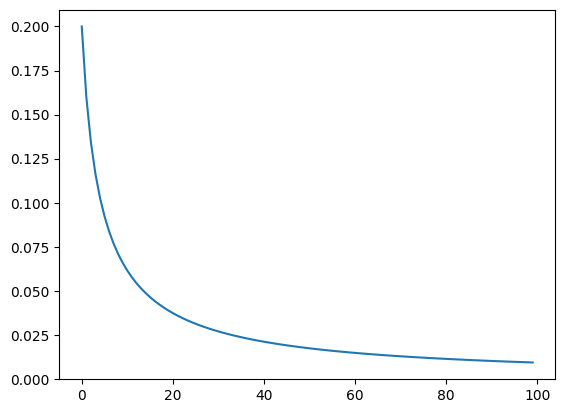

In [185]:

class Mapa_Logistico: 
    def __init__(self, r, x0, iteraciones):

        self.r = r
        self.x0 = x0
        self.iteraciones = iteraciones
        self.resultados = []
        
    def get_iteracion(self, n):
        if 0 <= n < len(self.resultados):
            return self.resultados[n]
        else:
            print("Dicha iteración no existe")
            
    def set_iteraciones(self):
        x = self.x0
        self.resultados.append(x)
        for i in range(1, self.iteraciones):
            x = self.r * x * (1 - x)
            self.resultados.append(x)
            
    def get_iteraciones(self): 
        return self.resultados 
    
    def get_grafica(self):
        plt.plot(range(len(self.resultados)), self.resultados)
        plt.show()
    
mapa_logistico = Mapa_Logistico(1, 0.2, 100)
mapa_logistico.set_iteraciones()
print(mapa_logistico.get_iteraciones())
print(mapa_logistico.get_iteracion(3))
mapa_logistico.get_grafica()
    
        
        

    
    

# Ejercicio 2: Exploración y comprensión (3 puntos)

a) Describe las principales variables del dataset proporcionado. ¿Qué información aportan y qué tipo de datos contiene cada una? ¿Existen valores faltantes en el dataset? Si es así, ¿en qué variables? ¿Qué propones para resolverlo? (1 puntos)


In [186]:
#Walmart.csv

df = pd.read_csv("C:/Users/userl/OneDrive - Universidad Pontificia Comillas/Documentos/Quinto/Visualizacion/Walmart.csv")
print(df.head(100))
# print(df.info())
# print(df.describe(include='all'))

#Todas las variables a excepción de Date parecen numéricas 

#  0   Store         6435 non-null   int64  
# Store variable de tipo numérica que indica, aparentemente de qué tienda se trata, ya que cada tienda tiene asignada un número 

#  1   Date          6435 non-null   object 
#Date es de tipo object, es la fecha en la que ocurre algo

#  2   Weekly_Sales  6435 non-null   float64
#Weekly_Sales numero de ventas semanales

#  3   Holiday_Flag  6435 non-null   int64  
# Booleanp, si ese día era fiesta

#  4   Temperature   6435 non-null   float64
#Temperature a dicha hora en dicha tienda

#  5   Fuel_Price    6435 non-null   float64
#Fuel_Price parecen gasolineras, precio de la gasolina

#  6   CPI           6435 non-null   float64

#  7   Unemployment  6434 non-null   float64

print(df.isna().sum(), "ISNA")

#Solo hay una variable con una fila/instancia no existente,Unemployment, se procederá a eliminar dicha fila.

# Store           0
# Date            0
# Weekly_Sales    0
# Holiday_Flag    0
# Temperature     0
# Fuel_Price      0
# CPI             0
# Unemployment    1
# dtype: int64 ISNA

#Inplace true para no tener que cambiar el nombre de la variable
df.dropna(inplace=True)
#Comprobamos que la eliminación ha funcionado
print(df.isna().sum(), "ISNA")




    Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1  05-02-2010    1643690.90             0        42.31       2.572   
1       1  12-02-2010    1641957.44             1        38.51       2.548   
2       1  19-02-2010    1611968.17             0        39.93       2.514   
3       1  26-02-2010    1409727.59             0        46.63       2.561   
4       1  05-03-2010    1554806.68             0        46.50       2.625   
..    ...         ...           ...           ...          ...         ...   
95      1  02-12-2011    1584083.95             0        48.91       3.172   
96      1  09-12-2011    1799682.38             0        43.93       3.158   
97      1  16-12-2011    1881176.67             0        51.63       3.159   
98      1  23-12-2011    2270188.99             0        47.96       3.112   
99      1  30-12-2011    1497462.72             1        44.55       3.129   

           CPI  Unemployment  
0   211.096358         8.106  
1

b) Realiza un gráfico de barras que responda las siguientes preguntas. ¿Cuántas tiendas $Store$ están presentes en el dataset? ¿Cuál es la media de ventas semanales $Weekly Sales$ por tienda? ¿Qué tiendas tienen las ventas promedio más altas y más bajas? (1 puntos)



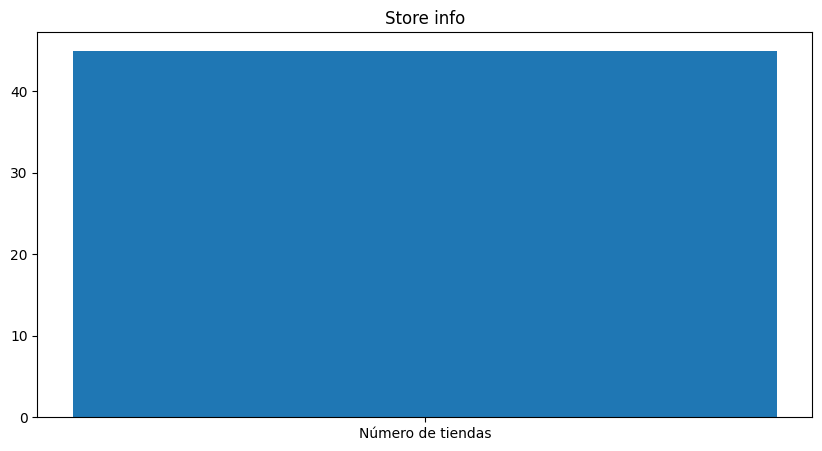

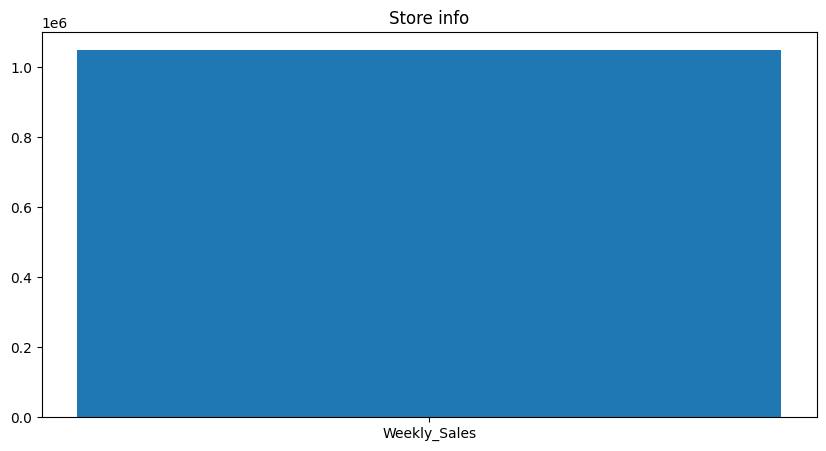

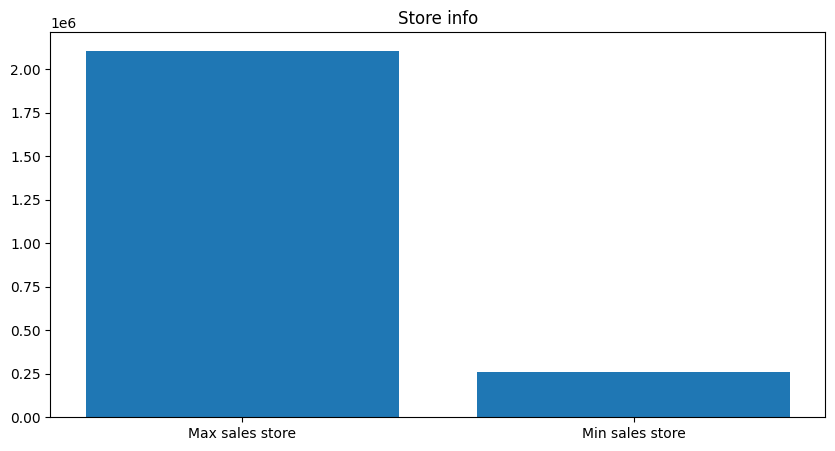

In [187]:
#Valores únicos de código identificador de tiendas, es decir, número de tiendas
num_stores = df["Store"].nunique()
mean_weekly_sales = df["Weekly_Sales"].mean()
# df.groupby('Store') nos da un df nuevo 
mean_sales_per_store = df.groupby('Store')['Weekly_Sales'].mean().reset_index()
max_sales_store = mean_sales_per_store.loc[mean_sales_per_store['Weekly_Sales'].idxmax()]
min_sales_store = mean_sales_per_store.loc[mean_sales_per_store['Weekly_Sales'].idxmin()]


#La store 2 es la de ventas semanales de media mas alta (2.107677e+06)
# Store           2.000000e+01
# Weekly_Sales    2.107677e+06
# Name: 19, dtype: float64 MAXIMA

#La store 33 es la de ventas semanales de media mas baja (259861.692028)
# Store               33.000000
# Weekly_Sales    259861.692028
# Name: 32, dtype: float64 MINIMA


plt.figure(figsize=(10, 5))
plt.bar(["Número de tiendas"], [num_stores])
plt.title('Store info')
# plt.xlabel('Coefficient Value')
# plt.ylabel('Feature')
plt.show()


plt.figure(figsize=(10, 5))
plt.bar(["Weekly_Sales"], [mean_weekly_sales])
plt.title('Store info')
# plt.xlabel('Coefficient Value')
# plt.ylabel('Feature')
plt.show()


plt.figure(figsize=(10, 5))
plt.bar(["Max sales store", "Min sales store"], [max_sales_store["Weekly_Sales"], min_sales_store["Weekly_Sales"]])
plt.title('Store info')
plt.show()


c) Genera un gráfico de líneas que muestre la evolución de las ventas semanales $Weekly Sales$ a lo largo del tiempo para la tienda con más ventas totales. ¿Observas algún patrón estacional o tendencia? (1 puntos)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
2717     20  05-02-2010    2401395.47             0        25.92       2.784   
2718     20  12-02-2010    2109107.90             1        22.12       2.773   
2719     20  19-02-2010    2161549.76             0        25.43       2.745   
2720     20  26-02-2010    1898193.95             0        32.32       2.754   
2721     20  05-03-2010    2119213.72             0        31.75       2.777   
...     ...         ...           ...           ...          ...         ...   
2855     20  28-09-2012    2008350.58             0        58.65       3.997   
2856     20  05-10-2012    2246411.89             0        60.77       3.985   
2857     20  12-10-2012    2162951.36             0        47.20       4.000   
2858     20  19-10-2012    1999363.49             0        56.26       3.969   
2859     20  26-10-2012    2031650.55             0        60.04       3.882   

             CPI  Unemployment  
2717  

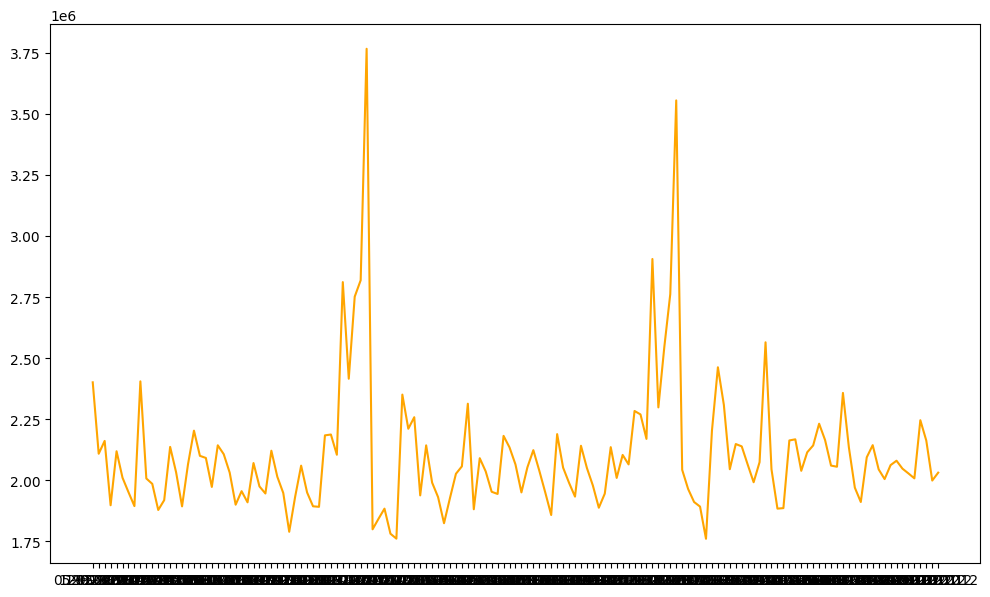

In [188]:
total_sales_each_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
store_max = total_sales_each_store.loc[total_sales_each_store['Weekly_Sales'].idxmax(), 'Store']

store_max_sales = df[df['Store'] == store_max]

print(store_max_sales)

plt.figure(figsize=(12, 7))
# Todas las fechas de la store_max_sales
plt.plot(store_max_sales['Date'], store_max_sales['Weekly_Sales'], color='orange')
# No sé que hacer para que las fechas se vean bien 
plt.show()

## Es estacional, hay dos claros picos de ventas con parecidos muy considerables

# Ejrcicio 3: Análisis de Factores Externos (2 puntos)

a) Explora la relación entre el precio de combustible $Fuel Price$, la tasa de desempleo $Unemployment$ y las ventas semanales $Weekly Sales$. ¿Existe alguna correlación significativa? Genera dos gráficos de dispersión (scatter plot) para ilustrarlo. (1 puntos)

Text(0, 0.5, 'Weekly Sales')

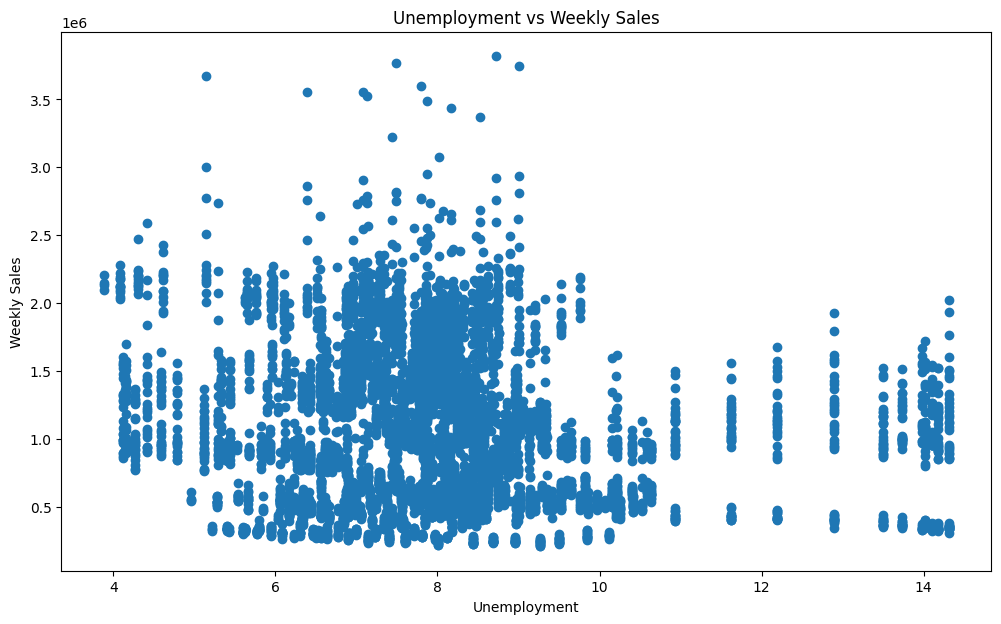

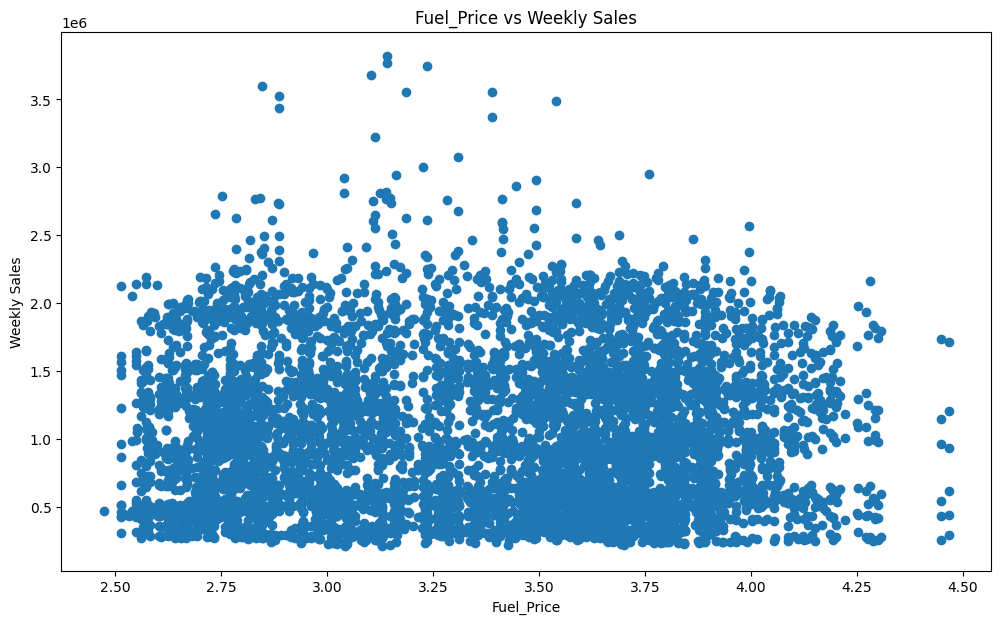

In [195]:
corr = df[['Fuel_Price', 'Unemployment', 'Weekly_Sales']].corr()
plt.figure(figsize=(12, 7))
plt.scatter(df['Unemployment'], df['Weekly_Sales'])

plt.title('Unemployment vs Weekly Sales')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')


corr = df[['Fuel_Price', 'Unemployment', 'Weekly_Sales']].corr()
plt.figure(figsize=(12, 7))
plt.scatter(df['Fuel_Price'], df['Weekly_Sales'])

plt.title('Fuel_Price vs Weekly Sales')
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly Sales')


c) Compara las ventas promedio de las semanas festivas $Holiday Flag = 1$ con las semanas no festivas $Holiday Flag = 0$. ¿Cuál es la diferencia promedio de ventas entre estos dos tipos de semanas? ¿Existe una diferencia estdísticamente significativa? (1 puntos)


# Ejercicio 4: Modelado predictivo (2 puntos)

a) Encuentra el mejor modelo de regresión lineal para predecir las ventas semanales $Weekly Sales$ en función de las variables disponibles. Prueba múltiples combinaciones de variables. (1.5 puntos)


In [189]:
## PRIMER MODELO

df2 = df
df2 = df2.drop(columns=["Date"])
X = df2.loc[:, df2.columns!= 'Weekly_Sales']
y = df2['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

lm = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ("lm", LinearRegression()),
])


lm = lm.fit(X_train, y_train)

print("Variance explanation R^2 = {}".format(round(lm.score(X, y),2)))
y_pred1 = lm.predict(X_test)

lmc = lm.named_steps['lm'].coef_



objects = X.columns
y_pos = np.arange(len(objects))
coefficients = lmc

fig = go.Figure()

# Agrego las trazas necesarias
fig.add_trace(
    go.Bar(
        x = coefficients,
        y = objects,
        name = "Coeficientes",
        orientation='h'
    )
)

# Actualizo el diseño
fig.update_layout(title = "LM coefficients importance", xaxis_title = "Coeficientes", yaxis_title = "Variables")

# Muestro la figura
fig.show()

Variance explanation R^2 = 0.14


In [190]:
## SEGUNDO MODELO

df3 = df

df3 = df3.drop(columns=["Date", "Store"])
X = df3.loc[:, df3.columns!= 'Weekly_Sales']
y = df3['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

lm = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ("lm", LinearRegression()),
])


lm = lm.fit(X_train, y_train)

print("Variance explanation R^2 = {}".format(round(lm.score(X, y),2)))
y_pred2 = lm.predict(X_test)

lmc = lm.named_steps['lm'].coef_
print(lmc)


objects = X.columns
y_pos = np.arange(len(objects))
coefficients = lmc

fig = go.Figure()

# Agrego las trazas necesarias
fig.add_trace(
    go.Bar(
        x = coefficients,
        y = objects,
        name = "Coeficientes",
        orientation='h'
    )
)

# Actualizo el diseño
fig.update_layout(title = "LM coefficients importance", xaxis_title = "Coeficientes", yaxis_title = "Variables")

# Muestro la figura
fig.show()

Variance explanation R^2 = 0.03
[ 13509.34556964 -12493.73838976   -550.0808159  -62154.32973264
 -76404.59005151]


In [191]:
## TERCER MODELO
#Quitamos todas las variables que no explican mucho
df4 = df

df4 = df4.drop(columns=["Date", "Store", "Fuel_Price", "Temperature", "Holiday_Flag"])
X = df4.loc[:, df4.columns!= 'Weekly_Sales']
y = df4['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

lm = Pipeline(steps=[
  ('scaler', StandardScaler()),
  ("lm", LinearRegression()),
])


lm = lm.fit(X_train, y_train)

print("Variance explanation R^2 = {}".format(round(lm.score(X, y),2)))
y_pred3 = lm.predict(X_test)

lmc = lm.named_steps['lm'].coef_
print(lmc)


objects = X.columns
y_pos = np.arange(len(objects))
coefficients = lmc

fig = go.Figure()

# Agrego las trazas necesarias
fig.add_trace(
    go.Bar(
        x = coefficients,
        y = objects,
        name = "Coeficientes",
        orientation='h'
    )
)

# Actualizo el diseño
fig.update_layout(title = "LM coefficients importance", xaxis_title = "Coeficientes", yaxis_title = "Variables")

# Muestro la figura
fig.show()

Variance explanation R^2 = 0.02
[-64977.78590438 -78272.302248  ]


b) Compara los modelos evalúando el R² y el error cuadrático medio (MSE). ¿Cuál es el modelo con mejores métricas? (0.5 puntos)


In [192]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred1))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred1))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred1))


print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred2))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred2))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred2))


print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred3))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred3))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred3))


# Mean squared error: 266826659971.09
# Mean absolute error: 426688.62
# Coefficient of determination: 0.15
# Mean squared error: 305242675524.87
# Mean absolute error: 466280.76
# Coefficient of determination: 0.03
# Mean squared error: 306765786492.70
# Mean absolute error: 466538.44
# Coefficient of determination: 0.03


#El mejor modelo es el primero
     

Mean squared error: 266826659971.09
Mean absolute error: 426688.62
Coefficient of determination: 0.15
Mean squared error: 305242675524.87
Mean absolute error: 466280.76
Coefficient of determination: 0.03
Mean squared error: 306765786492.70
Mean absolute error: 466538.44
Coefficient of determination: 0.03


# Ejercicio 5: Conclusiones y Recomendaciones (1 punto)

a) Redacta un informe de máximo 500 palabras resumiendo los principales hallazgos del análisis de datos y la modelización. Incluye tus conclusiones sobre qué factores influyen más en las ventas y recomendaciones para la empresa basadas en el análisis.

In [ ]:
Aparentemente el mejor modelo es el que incluye todas las variables tal y como hemos podido comprobar, las variables que más influyen en la variable dependiente ventas ha resultado el unemployment y el CPI.